# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [27]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape
#print(X_train['labels'])
# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(train['labels']))

print("Number of training examples =", n_train)
print("Number of valid examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of valid examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [28]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

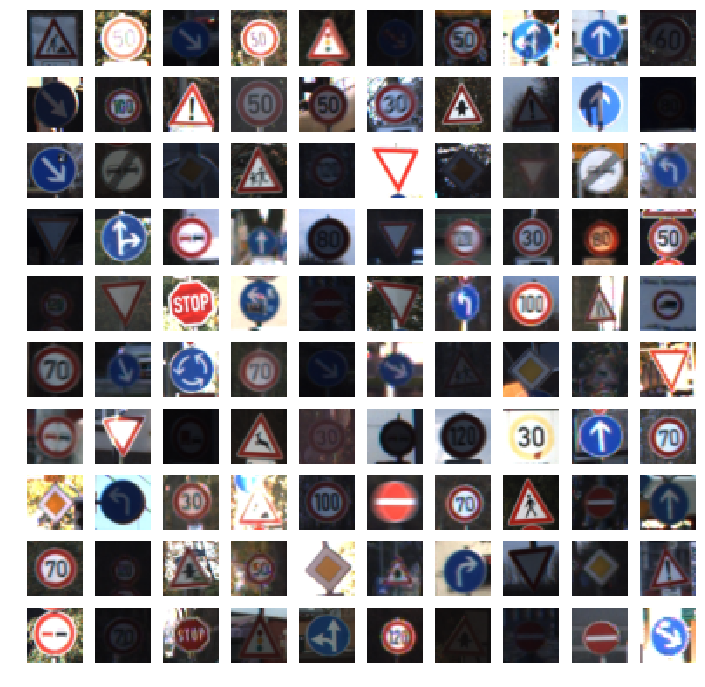

In [4]:
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
plt.figure(figsize=(12,12))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    idx = np.random.randint(0,n_train) #transform_image(image,20,10,5,brightness=1)
    plt.subplot(10,10,i+1)
    plt.imshow(X_train[idx])
    plt.axis('off')

plt.show()

### Distribution of classes

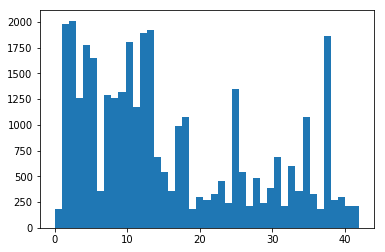

In [29]:
plt.hist(train['labels'], bins=n_classes);
plt.savefig('writeup_images/distribution_classes.png')

In [30]:
freq = np.bincount(train['labels'])
max_freq = 250#np.max(freq) 
print("max occurence:"+str(np.max(freq)))
print("min occurence:"+str(np.min(freq)))

max occurence:2010
min occurence:180


C:\Users\alessandro.colombo\AppData\Local\Continuum\anaconda3\envs\imagecrop36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


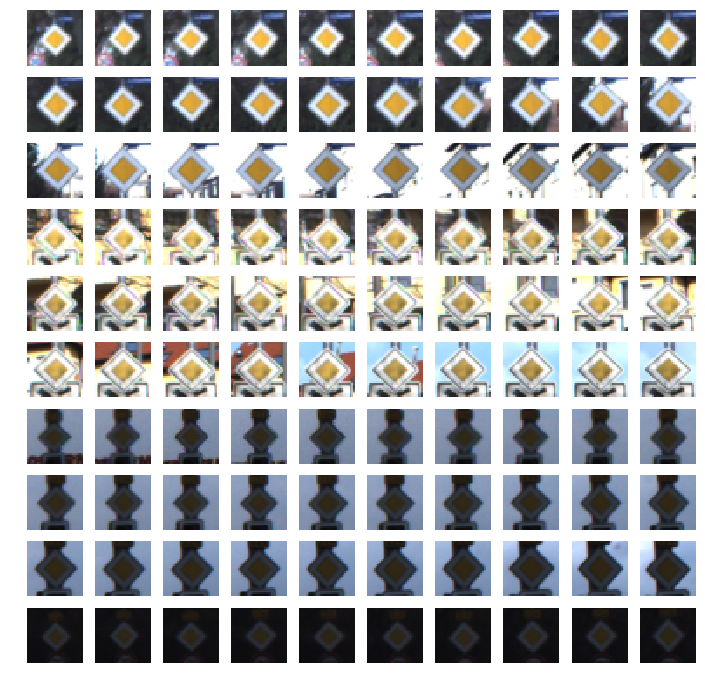

In [7]:
sub_samples = train['features'][[train['labels']==12]]

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
plt.figure(figsize=(12,12))

for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    plt.subplot(10,10,i+1)
    plt.imshow(sub_samples[i])
    plt.axis('off')

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [32]:
import cv2
from keras.utils import to_categorical
from skimage import color, exposure, transform
import matplotlib.image as mpimg
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def rgb2gray(rgb):
        return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]).reshape((32,32,1))
    
def augment_brightness_camera_images(image):
        image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
        random_bright = .25+np.random.uniform()

        image1[:,:,2] = image1[:,:,2]*random_bright
        image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
        return image1
    
def preprocess_image(img):
    #img = augment_brightness_camera_images(img)
    #img = rgb2gray(img)
    
    hsv = color.rgb2hsv(img)
    hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2])
    img = color.hsv2rgb(hsv)

    # central square crop
    min_side = min(img.shape[:-1])
    centre = img.shape[0] // 2, img.shape[1] // 2
    img = img[centre[0] - min_side // 2:centre[0] + min_side // 2,
              centre[1] - min_side // 2:centre[1] + min_side // 2,
              :]
    
    return img

mpimg.imsave('writeup_images/original_image.png',X_train[1000])
X_train = np.array([preprocess_image(i) for i in X_train])
X_valid = np.array([preprocess_image(i) for i in X_valid])
X_test =  np.array([preprocess_image(i) for i in X_test])
y_train = np.expand_dims(y_train,axis=1)
y_valid = np.expand_dims(y_valid,axis=1)
y_test = np.expand_dims(y_test,axis=1)

mpimg.imsave('writeup_images/preprocessed_image.png',X_train[1000])

(34799, 1)

## Augment the data
Since in the cell above we seen an highly imbalanced dataset, here I will try to augment the data generating fake data for the classes that don't have enough samples (compared to the others in the dataset)

In [35]:
def transform_image(img,ang_range,shear_range,trans_range):

    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
        
    return np.expand_dims(img, axis=0)

#test the augmentation
aug_img = transform_image(X_train[1000],20,10,5)
mpimg.imsave('writeup_images/aug_image.png',aug_img[0])

In [8]:
import cv2

def transform_image(img,ang_range,shear_range,trans_range):

    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
        
    return np.expand_dims(img, axis=0)

def augment_class_data(sig_class, max_n, current_class_samples, current_label_class):
    cnt = 0
    augmented_samples = np.copy(current_class_samples)
    augmented_labels = np.copy(current_label_class)
    actual_size = current_label_class.shape[0]
    while True:
        if cnt >= max_n:
            break
        augmented_samples = np.vstack((augmented_samples,transform_image(current_class_samples[cnt%actual_size],20,10,5)))
        augmented_labels = np.concatenate((augmented_labels,np.expand_dims(sig_class, axis=0)))
        cnt+=1
        
        
    return augmented_samples, augmented_labels

final_train = None

for sign_class in set(train['labels']):
    current_class_features = train['features'][[train['labels']==sign_class]]
    current_class_labels = train['labels'][[train['labels']==sign_class]]
    print("Augmenting class "+str(sign_class)+" initial size is "+str(current_class_features.shape[0]))
    augmented_features, augmented_labels = augment_class_data(sign_class, max_freq-freq[sign_class], current_class_features, current_class_labels)
    print("Class size now is "+str(augmented_features.shape[0]))
    if final_train is None:
        final_train = np.copy(augmented_features)
        final_labels = np.copy(augmented_labels)
    else:
        final_train = np.vstack((final_train,augmented_features))
        final_labels = np.append(final_labels,augmented_labels)

X_train = np.squeeze(np.array(final_train))
y_train = np.squeeze(np.array(final_labels)).reshape(-1)

/home/thenhz/anaconda3/envs/imagecrop/lib/python3.6/site-packages/ipykernel_launcher.py:47: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thenhz/anaconda3/envs/imagecrop/lib/python3.6/site-packages/ipykernel_launcher.py:48: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Augmenting class 0 initial size is 180
Class size now is 250
Augmenting class 1 initial size is 1980
Class size now is 1980
Augmenting class 2 initial size is 2010
Class size now is 2010
Augmenting class 3 initial size is 1260
Class size now is 1260
Augmenting class 4 initial size is 1770
Class size now is 1770
Augmenting class 5 initial size is 1650
Class size now is 1650
Augmenting class 6 initial size is 360
Class size now is 360
Augmenting class 7 initial size is 1290
Class size now is 1290
Augmenting class 8 initial size is 1260
Class size now is 1260
Augmenting class 9 initial size is 1320
Class size now is 1320
Augmenting class 10 initial size is 1800
Class size now is 1800
Augmenting class 11 initial size is 1170
Class size now is 1170
Augmenting class 12 initial size is 1890
Class size now is 1890
Augmenting class 13 initial size is 1920
Class size now is 1920
Augmenting class 14 initial size is 690
Class size now is 690
Augmenting class 15 initial size is 540
Class size now i

In [ ]:
y_train.shape

### Let's verify if now classes are balanced

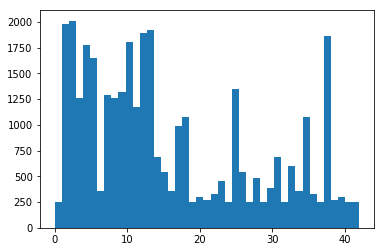

In [9]:
plt.hist(final_labels, bins=n_classes);

In [7]:
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
    rescale=1./255
    #zca_whitening=True
)
#datagen.fit(X_train)

### Model Architecture

In [8]:
import keras
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard, LearningRateScheduler
from keras.optimizers import Adagrad, Adam, SGD
from keras.layers import BatchNormalization, Activation, Dropout, Dense, Input, Flatten
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.merge import concatenate
from keras.layers.pooling import MaxPooling2D
from keras.models import Model
from keras.regularizers import l2

def LeNet():
    model = keras.Sequential()

    model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
    model.add(layers.AveragePooling2D())
    model.add(layers.Conv2D(filters=16, kernel_size=(4, 3), activation='relu'))
    model.add(layers.AveragePooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(units=120, activation='relu'))
    model.add(layers.Dense(units=84, activation='relu'))
    model.add(layers.Dense(units=n_classes, activation = 'softmax'))
    
    return model

def LeNetImproved():
    model = keras.Sequential()

    model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,3)))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(units=120, activation='relu'))
    model.add(layers.Dropout(0.7))
    model.add(layers.Dense(units=84, activation='relu'))
    model.add(layers.Dropout(0.7))
    model.add(layers.Dense(units=n_classes, activation = 'softmax'))
    
    return model

def LeNetImproved2():
    
    model = keras.Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32,32,3), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    return model
    

def customNet():
    input_img = Input((32, 32, 3), name="input")
    c11 = Conv2D(filters=3, kernel_size=(1, 1), padding='same', activation='relu', name="c11")(input_img)
    c12 = Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', name="c12")(c11)
    c13 = Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', name="c13")(c12)
    p11 = MaxPooling2D((3, 3), padding='same', name="mp11")(c13)
    d11 = Dropout(0.5, name="dr11")(p11)
    
    c21 = Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu', name="c21")(d11)
    c22 = Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu', name="c22")(c21)
    p21 = MaxPooling2D((3, 3), padding='same', name="mp21")(c22)
    d21 = Dropout(0.5, name="dr21")(p21)
    
    c31 = Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu', name="c31")(d21)
    c32 = Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu', name="c32")(c31)
    p31 = MaxPooling2D((3, 3), padding='same', name="mp31")(c32)
    d31 = Dropout(0.5, name="dr31")(p31)
    
    f1 = Flatten()(d11)
    f2 = Flatten()(d21)
    f3 = Flatten()(d31)
    flat = concatenate([f1,f2,f3])
    d1 = Dense(1024, activation='relu', name="d1")(flat)
    dd1 = Dropout(0.5, name="drf1")(d1)
    d2 = Dense(1024, activation='relu', name="d2")(dd1)
    dd2 = Dropout(0.5, name="drf2")(d2)
    outputs = Dense(n_classes, activation='softmax', name="output")(dd2)
    
    model = Model(inputs=[input_img], outputs=[outputs])
    
    return model

model = LeNetImproved2()
model.summary()

lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

model.compile(
    optimizer=SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True), 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
import datetime
import os



#from keras.utils.training_utils import multi_gpu_model
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
new_dir = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S') 
if not os.path.exists("./logs/" + new_dir):
    os.makedirs("./logs/" + new_dir)
if not os.path.exists("./logs/" + new_dir + "/checkpoints"):
    os.makedirs("./logs/" + new_dir + "/checkpoints")
if not os.path.exists("./logs/" + new_dir + "/tensorboard"):
    os.makedirs("./logs/" + new_dir + "/tensorboard")


batch_size=32
epochs=100
load_checkpoint=False

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    #ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.0001, verbose=1),
    LearningRateScheduler(lr_schedule),
    ModelCheckpoint('./logs/' + new_dir + '/checkpoints/lenet.h5', verbose=1,
                    save_best_only=True, save_weights_only=True),
    #TensorBoard(log_dir='./logs/' + new_dir + '/tensorboard')
]

#model = multi_gpu_model(model, gpus=2)
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
#os.environ["CUDA_VISIBLE_DEVICES"]="1"


if load_checkpoint:
    model.load_weights(model_path)


In [13]:
results = model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=batch_size), 
    epochs=epochs,
    steps_per_epoch=(X_train.shape[0] // batch_size),
    validation_data=datagen.flow(X_valid, y_valid, batch_size=batch_size),
    validation_steps=(X_valid.shape[0] // batch_size),
    callbacks=callbacks
)

Epoch 1/100
1099/1099 [==============================] - 8s 8ms/step - loss: 1.2604 - acc: 0.6433 - val_loss: 0.4160 - val_acc: 0.8832

Epoch 00001: val_loss improved from inf to 0.41600, saving model to ./logs/2019-10-17_22-03-32/checkpoints/lenet.h5
Epoch 2/100
1099/1099 [==============================] - 6s 6ms/step - loss: 0.1991 - acc: 0.9428 - val_loss: 0.3254 - val_acc: 0.9303

Epoch 00002: val_loss improved from 0.41600 to 0.32540, saving model to ./logs/2019-10-17_22-03-32/checkpoints/lenet.h5
Epoch 3/100
1099/1099 [==============================] - 6s 6ms/step - loss: 0.1240 - acc: 0.9655 - val_loss: 0.3854 - val_acc: 0.9173

Epoch 00003: val_loss did not improve from 0.32540
Epoch 4/100
1099/1099 [==============================] - 6s 6ms/step - loss: 0.1037 - acc: 0.9714 - val_loss: 0.2334 - val_acc: 0.9516

Epoch 00004: val_loss improved from 0.32540 to 0.23341, saving model to ./logs/2019-10-17_22-03-32/checkpoints/lenet.h5
Epoch 5/100
1099/1099 [==========================

In [9]:
### Load the saved weights
model_path = "./lenet"
model.load_weights(model_path)

In [10]:
model.evaluate(X_test,y_test, batch_size=32)
#loss and accurancy

12630/12630 [==============================] - 9s 730us/step


[0.24091046264753488, 0.9403008818626404]

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

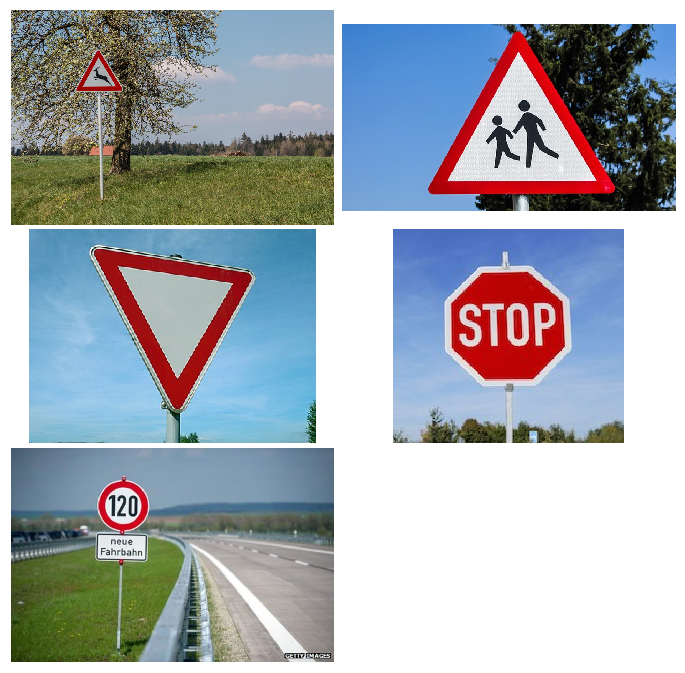

In [11]:
import glob
import matplotlib.image as mpimg

images = glob.glob("test_images/*.jpg")

gs1 = gridspec.GridSpec(3, 2)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
plt.figure(figsize=(12,12))
for i, img in enumerate(images):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    plt.imshow(mpimg.imread(img))
    plt.axis('off')

plt.show()

### Predict the Sign Type for Each Image

#### Put the signs code in a dict

In [12]:
import csv

with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    mydict = {rows[0]:rows[1] for rows in reader}

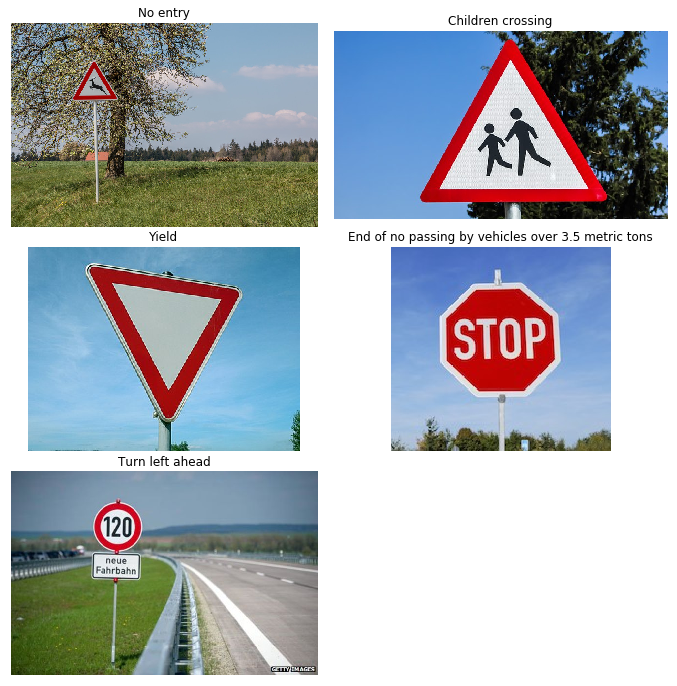

In [13]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

    
gs1 = gridspec.GridSpec(3, 2)
gs1.update(wspace=0.01, hspace=0.1) # set the spacing between axes.
plt.figure(figsize=(12,12))
for i, img in enumerate(images):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img_data = mpimg.imread(img)
    plt.imshow(img_data)
    img_prep = cv2.resize(img_data,(32,32))
    img_prep = preprocess_image(img_prep)
    ax1.set_title(mydict[str(np.argmax(model.predict(np.expand_dims(img_prep,0))))])
    plt.axis('off')

plt.show()

## Let's see how it works with well cropped images (like the ones used for testing)

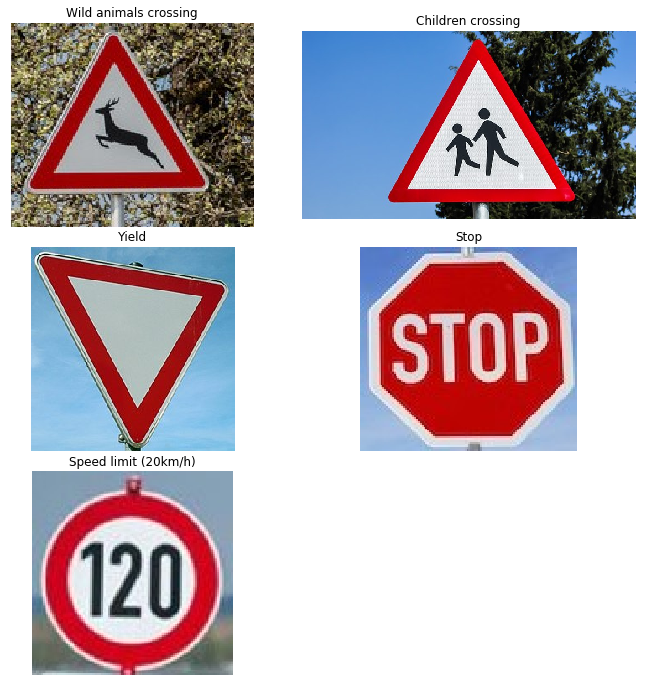

In [40]:
images = glob.glob("test_images_cropped/*.jpg")

gs1 = gridspec.GridSpec(3, 2)
gs1.update(wspace=0.01, hspace=0.1) # set the spacing between axes.
plt.figure(figsize=(12,12))
for i, img in enumerate(images):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img_data = mpimg.imread(img)
    plt.imshow(img_data)
    img_prep = cv2.resize(img_data,(32,32))
    img_prep = preprocess_image(img_prep)
    ax1.set_title(mydict[str(np.argmax(model.predict(np.expand_dims(img_prep,0))))])
    plt.axis('off')

plt.show()

### Analyze Performance

In [18]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
ground_truth = [[31],[28],[13],[14],[8]]
ground_truth = np.array(ground_truth)
def get_images(images_dir):
    all_imgs = []
    for img in images_dir:
        img_data = mpimg.imread(img)
        img_prep = cv2.resize(img_data,(32,32))
        img_prep = preprocess_image(img_prep)
        all_imgs.append(img_prep)
    return all_imgs

images = glob.glob("test_images/*.jpg")
images_data = np.array([i for i in get_images(images)])
model.evaluate(images_data, ground_truth, batch_size=2)

5/5 [==============================] - 0s 2ms/step


[2.468658781051636, 0.4000000059604645]

In [19]:
images = glob.glob("test_images_cropped/*.jpg")
images_data = np.array([i for i in get_images(images)])
model.evaluate(images_data, ground_truth, batch_size=2)

5/5 [==============================] - 0s 3ms/step


[0.8883166432380676, 0.800000011920929]

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

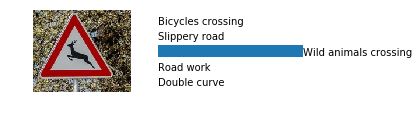

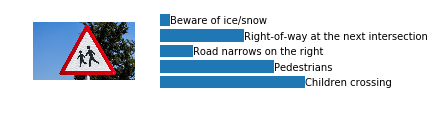

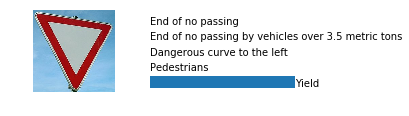

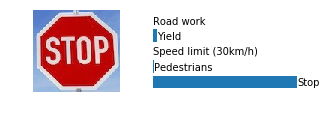

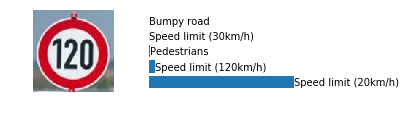

In [41]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def top5_pred(img_data):
    img_prep = cv2.resize(img_data,(32,32))
    img_prep = preprocess_image(img_prep)
    preds = model.predict(np.expand_dims(img_prep,0))
    pred_idxs = np.argpartition(preds[0], -5)[-5:]
    return preds[0][pred_idxs], pred_idxs


for i in range(len(images)):
    plt.figure(figsize = (5,1.5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[2,3])
    plt.subplot(gs[0])
    img_data = mpimg.imread(images[i])
    plt.imshow(img_data)
    plt.axis('off')
    plt.subplot(gs[1])
    pred_val, pred_idxs = top5_pred(img_data)
    plt.barh(6-np.arange(5),pred_val, align='center')
    for i_label in range(5):
        plt.text(pred_val[i_label],6-i_label-.25,mydict[str(pred_idxs[i_label])])
    plt.axis('off');
    #plt.text(0,6.95,namenewdata[i].split('.')[0]);
    plt.show();

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

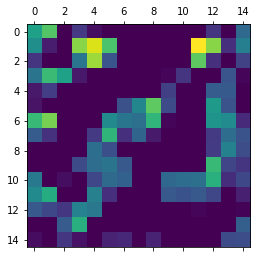

In [47]:
layer_outputs = [layer.output for layer in model.layers] 

# Extracts the outputs of all the layers
# Creates a model that will return these outputs, given the model input
activation_model = Model(inputs=model.input, outputs=layer_outputs) 

activations = activation_model.predict(np.expand_dims(X_train[0], axis=0))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

# **Traffic Sign Recognition** 

## Writeup

---

**Build a Traffic Sign Recognition Project**

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report


[//]: # (Image References)

[image1]: ./writeup_images/distribution_classes.png "Distribution of dataset"
[image2]: ./writeup_images/original_image.png "Original Image"
[image2p]: ./writeup_images/preprocessed_image.png "Preprocessed Image"
[image3]: ./writeup_images/aug_image.png "Augmented Image"
[image4]: ./test_images/_67626131_speed-limit.jpg "Traffic Sign 1"
[image5]: ./test_images/eyeem-141845386.jpg "Traffic Sign 2"
[image6]: ./test_images/test1.jpg "Traffic Sign 3"
[image7]: ./test_images/test3.jpg "Traffic Sign 4"
[image8]: ./test_images/test4.jpg "Traffic Sign 5"

## Rubric Points
### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/481/view) individually and describe how I addressed each point in my implementation.  

---
### Writeup / README

#### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one. You can submit your writeup as markdown or pdf. You can use this template as a guide for writing the report. The submission includes the project code.

You're reading it! and here is a link to my [project code](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb)

### Data Set Summary & Exploration

#### 1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

I used the numpy library to calculate summary statistics of the traffic
signs data set:

* The size of training set is 34799
* The size of the validation set is 4410
* The size of test set is 12630
* The shape of a traffic sign image is (32,32,3)
* The number of unique classes/labels in the data set is 43

#### 2. Include an exploratory visualization of the dataset.

Here is an exploratory visualization of the data set. It is a bar chart showing how the data is distributed. Here we can see that this dataset is highly unbalanced and this could lead to an unproper training of our network and thus having some road sign not correctly predicted

![alt text][image1]

### Design and Test a Model Architecture

#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

As a first step, I decided to convert the images to grayscale but that didn't seem to increase my network accurancy. I've run many training session and it seemed that preserving the color (with an additional preprocess phase) was increasing the accurancy (but sometimes even running twice the same network changed the accurancy by 1%). The preprocess I've tried to apply was first an augmentation of brightness but even there, no major improvement where found while instead, equalizing histogram by enhancing with low contrast seemed to bring some improvement in accurancy.

Here is an example of a traffic sign image before and after applying the histogram equalization.

![alt text][image2]
![alt text][image2p]

You can see that even applying that preprocess, the image kepps looking very natural

Due to the unimbalanced nature of dataset, I decided to generate additional data. I wrote a code that, given a threshold, generates many new data starting from the original one by applying randomly a rotation, translation, shear and brightness. I've choosen this way instead of relying on the *ImageDataGenerator* augmentation function provided by keras because here I wanted to augment only some particular classes and not the whole dataset

Here is an example an augmentation (original is the one above):

![alt text][image3]



#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| Convolution 3x3x32   	| 3x3 stride, same padding, outputs 32x32x32 	|
| RELU					|												|
| Convolution 3x3x32   	| 3x3 stride, same padding, outputs 30x30x32 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 15x15x32 				|
| Convolution 3x3x64   	| 3x3 stride, same padding, outputs 15x15x64 	|
| RELU					|												|
| Convolution 3x3x64   	| 3x3 stride, same padding, outputs 13x13x64 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 6x6x64   				|
| Dropout               | Droput with 20% probability                   |
| Convolution 3x3x128  	| 3x3 stride, same padding, outputs 6x6x128 	|
| RELU					|												|
| Convolution 3x3x128  	| 3x3 stride, same padding, outputs 4x4x128 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 2x2x128  				|
| Dropout               | Droput with 20% probability                   |
| Flatten               | Flattening to link with Dense layer           |
| Dense         	    | 512 neurons  									|
| RELU					|												|
| Dense         	    | 43 neurons  									|
| Softmax				|           									|
 


#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

To build the above model, I used Keras framework since is much less verbose than tensorflow (I swear I know even programming with tensorflow). To train the model, I've tried many different hyperparameters, included the one related on the augmentation function (generating many augmented images didn't increase the final accurancy). I've tryed different optimizers like *Adam* or *Adagrad* and finally *SGD*. To avoid overfitting I've introduced then the droput and even the regularizers (that then I removed). Leveraging on the the already available callbacks in Keras I didn't take much care of the epochs since I used the early stopping while saving the best model based on *validation_loss* score. I even used the *ReduceLROnPlateau* callback to lower the learning rate when no improvements are found, but then I wrote a custom function for the SGD optimizer.

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

In addition of what described above, I've implemented several networks, starting from LeNet to a custom Network that probably was to complex for the dataset we are using. I've tried different run, with many parameters and I tuned my networks based on the outcome (overfitting, not enough generalization) by adding or subtracting layers or fine tuning layer parameters (regularizers, activations, MaxPool vs AvgPool). 
I've tried different kernel size and different stride options and then different probabilities for the droputs.
I even thought to use transfer learning starting from a well known architecture but that felt like using too much power for such a simple task (I mean, based on the dataset provided)

My final model results were:
* training set accuracy of 99.7%
* validation set accuracy of 97.26%
* test set accuracy of 94%


### Test a Model on New Images

#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Here are five German traffic signs that I found on the web:

![alt text][image4] ![alt text][image5] ![alt text][image6] 
![alt text][image7] ![alt text][image8]

The first and the second images might be difficult to classify because the provided training dataset is depicting well cropped images while these first 2 include a background that might fool the network. if you look at the notebook, you can find that cropping those images I've found on internet led to a better prediction accurancy

#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Here are the results of the prediction with the original images found on internet:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Wild animal crossing	| No entry  									| 
| Children crossing 	| Children crossing								|
| Yield					| Yield											|
| 120 km/h	      		| 20 km/h   					 				|
| Stop      			| End of no passing by vehicles over 3.5 tons	|


If considering the prediction on the original images, the model was able to correctly guess 2 of the 5 traffic signs, which gives an accuracy of 80%. This is much less than the test 

Below you can find the prediction after cropping the images

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Wild animal crossing	| Wild animal crossing							| 
| Children crossing 	| Children crossing								|
| Yield					| Yield											|
| 120 km/h	      		| 20 km/h   					 				|
| Stop      			| Stop                                      	|


If considering the prediction on the cropped images, the model was able to correctly guess 4 of the 5 traffic signs, which gives an accuracy of 80%. This is much less than the test but better than the above score

#### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

The code for making predictions on my final model is located at the end of the Ipython notebook.

For all the images but the speed limit one, the model is relatively sure that the sign is what it really is (there are relatively high probabilities for the *children crossing* one). For the speed limits, even here the model is pretty sure it is 20km/h one but the image tells us it wrong. Probably is an effect of the unbalanced dataset


### (Optional) Visualizing the Neural Network (See Step 4 of the Ipython notebook for more details)
#### 1. Discuss the visual output of your trained network's feature maps. What characteristics did the neural network use to make classifications?

